In [8]:
%matplotlib inline

# Import dependencies
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import scipy.stats as stats
from scipy.stats import linregress

# Import dependency and set theme for visualizations
import seaborn as sns
color_theme = sns.set_palette("muted")
sns.set(rc={'axes.facecolor': 'gainsboro', 'figure.facecolor':'whitesmoke'})

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

In [9]:
# Store file path
csv_path="Output/Weather_Data.csv"

# Read the csv file
weather_df = pd.read_csv(csv_path).drop(columns="Index")

# Display the dataset
weather_df.head()

,Port Name,Timestamp,Year,Month,Border,Latitude,Longitude,Value,Temperature,Cloudiness,Humidity,Wind Speed,Weather condition,Himidity
0,Alcan,1514764800,2018,1,US-Canada Border,63.33693,-142.98928,3809,-25.35,100,73,1.59,Clouds,73.0
1,Alcan,1517443200,2018,2,US-Canada Border,63.33693,-142.98928,3759,-28.87,17,84,1.02,Clouds,84.0
2,Alcan,1519862400,2018,3,US-Canada Border,63.33693,-142.98928,5609,-13.19,0,59,3.47,Clear,59.0
3,Alcan,1522540800,2018,4,US-Canada Border,63.33693,-142.98928,8924,0.09,97,49,2.39,Clouds,49.0
4,Alcan,1525132800,2018,5,US-Canada Border,63.33693,-142.98928,21087,9.32,83,45,5.00,Clouds,45.0


## Question 6:  How do Weather conditions correlate with border crossing between US-Canada and US-Mexico in 2018?

In [11]:
# Reduce the dataset to the columns needed for analysis
weather_data = weather_df[['Month', 'Port Name', 'Border', 'Value',
                           'Temperature', 'Cloudiness', 'Humidity', 'Wind Speed', 'Weather condition']]
weather_data.head()

,Month,Port Name,Border,Value,Temperature,Cloudiness,Humidity,Wind Speed,Weather condition
0,1,Alcan,US-Canada Border,3809,-25.35,100,73,1.59,Clouds
1,2,Alcan,US-Canada Border,3759,-28.87,17,84,1.02,Clouds
2,3,Alcan,US-Canada Border,5609,-13.19,0,59,3.47,Clear
3,4,Alcan,US-Canada Border,8924,0.09,97,49,2.39,Clouds
4,5,Alcan,US-Canada Border,21087,9.32,83,45,5.00,Clouds


In [12]:
# Convert the data in "Month" column to display the first three character of the month
weather_data['Months'] = weather_data['Month'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
                                              ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Display the converted dataset
weather_data.head()

,Month,Port Name,Border,Value,Temperature,Cloudiness,Humidity,Wind Speed,Weather condition,Months
0,1,Alcan,US-Canada Border,3809,-25.35,100,73,1.59,Clouds,Jan
1,2,Alcan,US-Canada Border,3759,-28.87,17,84,1.02,Clouds,Feb
2,3,Alcan,US-Canada Border,5609,-13.19,0,59,3.47,Clear,Mar
3,4,Alcan,US-Canada Border,8924,0.09,97,49,2.39,Clouds,Apr
4,5,Alcan,US-Canada Border,21087,9.32,83,45,5.00,Clouds,May


In [13]:
# Define a function to create Linear Regression plots

def linear_regression_plot(x_values, y_values, text_coord):

    # Calculate values for linear regression equation
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate y-values for the linear regression line
    regress_values = x_values * slope + intercept

    # Formulate the linear regression equation for display
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values, regress_values, "r-")

    # Add text annotation for line equation
    plt.annotate(line_eq, text_coord, fontsize=15, color=color_theme)
  
    # Print the r-value
    print(f"The p-value is: {p_value}")
    print(f"The r-value is: {r_value}")

## Temperature vs. Average Monthly Border traffic

The p-value is: 3.818991258935726e-28
The r-value is: 0.2943129738496457


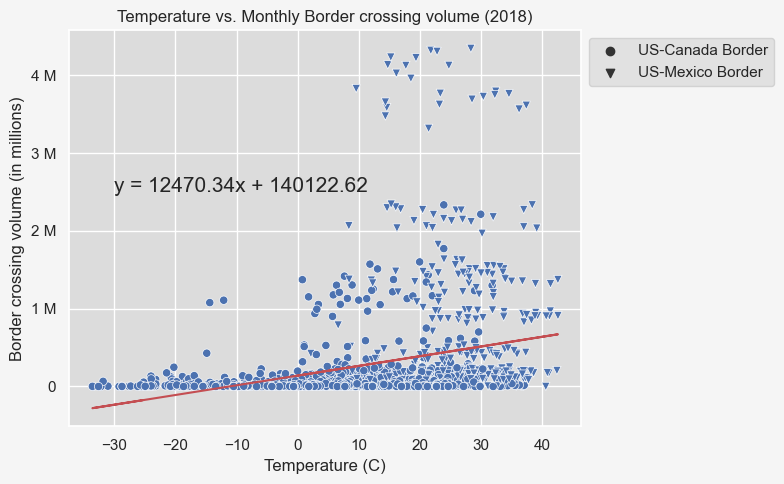

In [14]:
# Linear regression for Temperature vs. Monthly Border crossing traffic volume

# Define x-values, y-values and tex-coord for the plot
x_values = weather_data["Temperature"]
y_values = weather_data["Value"]
text_coords = (-30,2500000)

# Plot the chart and call the function to plot the linear regression
Fig26 = sns.scatterplot(x ='Temperature', y ='Value', data = weather_data, 
                        palette =color_theme, markers=['o', 'v'], style = "Border")
linear_regression_plot(x_values, y_values, text_coords)

# Format y-axis values to display in a better format
Fig26.yaxis.set_major_formatter(ticker.EngFormatter())

# Set chart title and axis labels
Fig26.set_xlabel("Temperature (C)")
Fig26.set_ylabel("Border crossing volume (in millions)")
Fig26.set_title("Temperature vs. Monthly Border crossing volume (2018)")

# Set legend details and figure parameters
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.rcParams['figure.figsize']=8,5
plt.rcParams["figure.autolayout"] = True

# Save the figure (This was commented out after saving to avoid overwriting the image every time the Jupyter Notebook is run again)
# plt.savefig("Images/Fig26.png")

# Show the chart
plt.show()

The p-value is: 3.818991258935726e-28
The r-value is: 0.2943129738496457


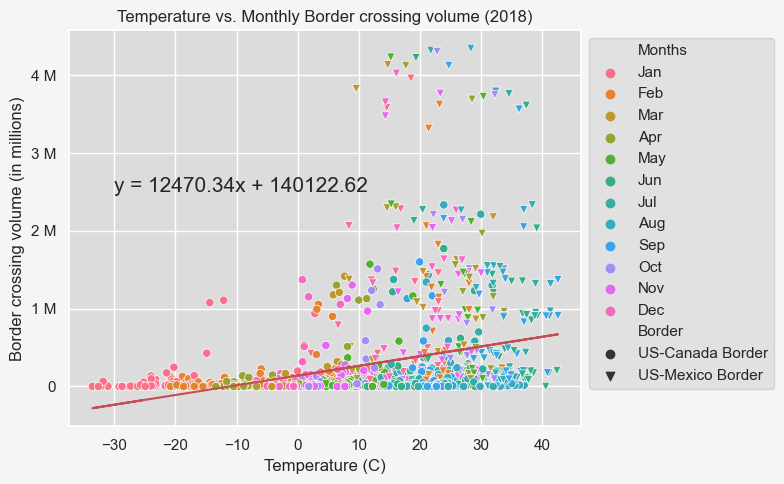

In [18]:
# Linear regression for Temperature vs. Monthly Border crossing traffic volume 

# Define x-values, y-values and tex-coord for regression line calculation
x_values = weather_data["Temperature"]
y_values = weather_data["Value"]
text_coords = (-30, 2500000)

# Plot the chart and call the function to plot the linear regression
Fig27 = sns.scatterplot(x ='Temperature', y ='Value', data = weather_data, hue ='Months', 
                        palette =color_theme, markers=['o', 'v'], style = "Border")
linear_regression_plot(x_values, y_values, text_coords)

# Format y-axis values to display in a better format
Fig27.yaxis.set_major_formatter(ticker.EngFormatter())

# Set chart title and axis labels
Fig27.set_xlabel("Temperature (C)")
Fig27.set_ylabel("Border crossing volume (in millions)")
Fig27.set_title("Temperature vs. Monthly Border crossing volume (2018)")

# Set legend details and figure parameters
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.rcParams['figure.figsize']=8,5
plt.rcParams["figure.autolayout"] = True

# Save the figure (This was commented out after saving to avoid overwriting the image every time the Jupyter Notebook is run again)
# plt.savefig("Images/Fig27.png")

# Show the chart
plt.show()

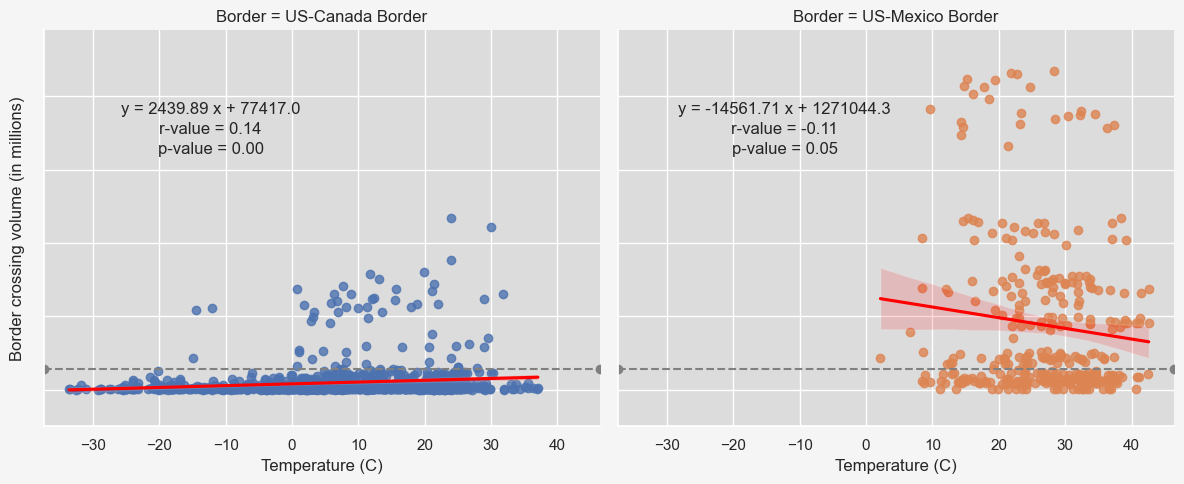

In [19]:
# Analysis of Temperature vs. Monthly Border crossing traffic volume between US-Canada and US-Mexico borders

# Plot the chart 
Fig28 = sns.lmplot(x ="Temperature", y ="Value", col="Border", data = weather_data,
                   aspect=1.2, palette=color_theme, line_kws={'color': 'red'}, 
                   hue = "Border", legend="false", sharey=True)

# Calculate regression line and add the annotations
def annotate(data, **kws):
        x, y, r_value, p_value, std_err = \
            stats.linregress(data['Temperature'],data['Value'])
        ax = plt.gca()
        ax.text(0.3, 0.8, f"y = {x:.2f} x + {y:.1f}",
                horizontalalignment='center',
                verticalalignment='center',
                transform=ax.transAxes)
        ax.text(0.3, 0.75, f"r-value = {r_value:.2f}", 
                horizontalalignment='center',
                verticalalignment='center',
                transform=ax.transAxes)
        ax.text(0.3, 0.7, f"p-value = {p_value:.2f}", 
                horizontalalignment='center',
                verticalalignment='center',
                transform=ax.transAxes)
Fig28.map_dataframe(annotate)

# Set axis labels
Fig28.set_xlabels("Temperature (C)")
Fig28.set_ylabels("Border crossing volume (in millions)")

# Set figure parameters
Fig28.set_yticklabels()
Fig28.axes[0, 1].tick_params(labelleft=True)
plt.ylim(-500000, 4900000)
plt.rcParams['figure.figsize']=5,3
plt.rcParams["figure.autolayout"] = True

# Add line showing mean values across the charts
Fig28.refline(y=weather_data["Value"].mean())

# Save the figure (This was commented out after saving to avoid overwriting the image every time the Jupyter Notebook is run again)
# plt.savefig("Images/Fig28.png")

# Show the chart
plt.show()

## Humidity vs. Average Monthly Border traffic

The p-value is: 3.0273979305151898e-12
The r-value is: -0.1891765190905691


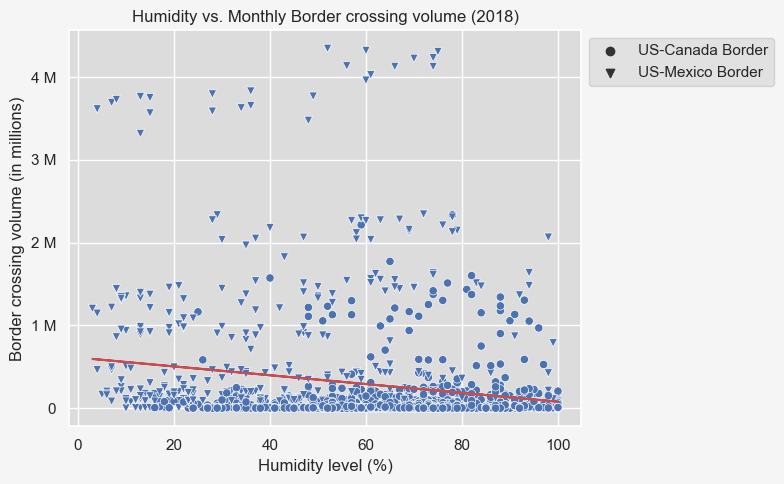

In [21]:
# Linear regression for Humidity vs. Monthly Border crossing traffic volume

# Define x-values, y-values and tex-coord for the plot
x_values = weather_data["Humidity"]
y_values = weather_data["Value"]
text_coords = (-30,2500000)

# Plot the chart and call the function to plot the linear regression
Fig29 = sns.scatterplot(x ='Humidity', y ='Value', data = weather_data, 
                        palette =color_theme, markers=['o', 'v'], style = "Border")
linear_regression_plot(x_values, y_values, text_coords)

# Format y-axis values to display in a better format
Fig29.yaxis.set_major_formatter(ticker.EngFormatter())

# Set chart title and axis labels
Fig29.set_xlabel("Humidity level (%)")
Fig29.set_ylabel("Border crossing volume (in millions)")
Fig29.set_title("Humidity vs. Monthly Border crossing volume (2018)")

# Set legend details and figure parameters
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.rcParams['figure.figsize']=8,5
plt.rcParams["figure.autolayout"] = True

# Save the figure (This was commented out after saving to avoid overwriting the image every time the Jupyter Notebook is run again)
# plt.savefig("Images/Fig29.png")

# Show the chart
plt.show()

The p-value is: 3.0273979305151898e-12
The r-value is: -0.1891765190905691


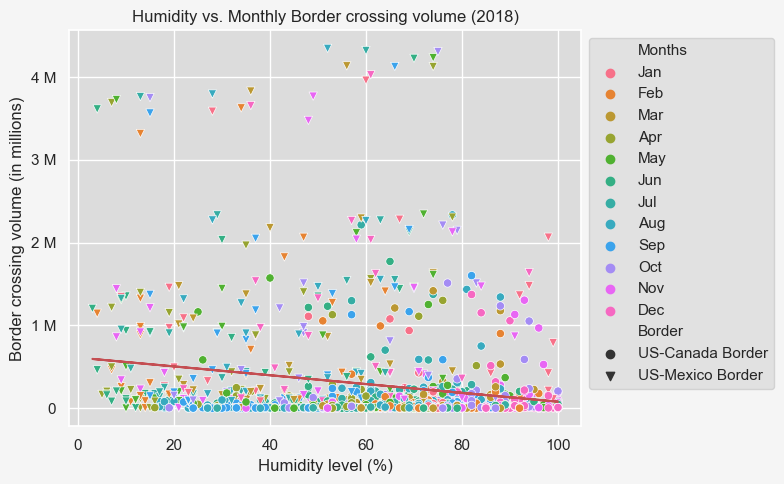

In [23]:
# Linear regression for Humidity vs. Monthly Border crossing traffic volume 

# Define x-values, y-values and tex-coord for regression line calculation
x_values = weather_data["Humidity"]
y_values = weather_data["Value"]
text_coords = (-30, 2500000)

# Plot the chart and call the function to plot the linear regression
Fig30 = sns.scatterplot(x ='Humidity', y ='Value', data = weather_data, hue ='Months', 
                        palette =color_theme, markers=['o', 'v'], style = "Border")
linear_regression_plot(x_values, y_values, text_coords)

# Format y-axis values to display in a better format
Fig30.yaxis.set_major_formatter(ticker.EngFormatter())

# Set chart title and axis labels
Fig30.set_xlabel("Humidity level (%)")
Fig30.set_ylabel("Border crossing volume (in millions)")
Fig30.set_title("Humidity vs. Monthly Border crossing volume (2018)")

# Set legend details and figure parameters
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.rcParams['figure.figsize']=8,5
plt.rcParams["figure.autolayout"] = True

# Save the figure (This was commented out after saving to avoid overwriting the image every time the Jupyter Notebook is run again)
# plt.savefig("Images/Fig30.png")

# Show the chart
plt.show()

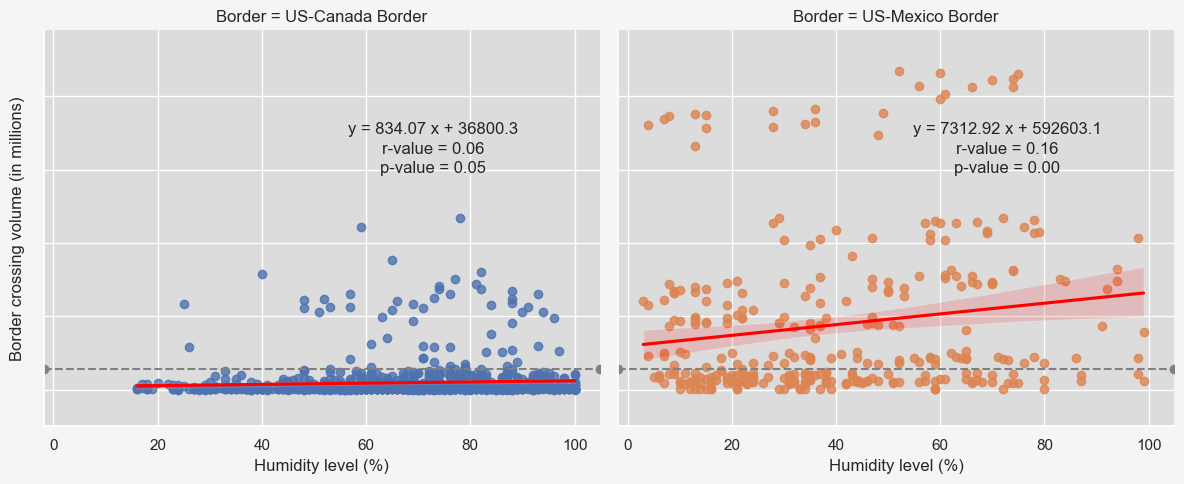

In [24]:
# Analysis of Humidity vs. Monthly Border crossing traffic volume between US-Canada and US-Mexico borders

# Plot the chart 
Fig31 = sns.lmplot(x ="Humidity", y ="Value", col="Border", data = weather_data,
                   aspect=1.2, palette=color_theme, line_kws={'color': 'red'}, 
                   hue = "Border", legend="false", sharey=True)

# Calculate regression line and add the annotations
def annotate(data, **kws):
        x, y, r_value, p_value, std_err = \
            stats.linregress(data['Humidity'],data['Value'])
        ax = plt.gca()
        ax.text(0.7, 0.75, f"y = {x:.2f} x + {y:.1f}",
                horizontalalignment='center',
                verticalalignment='center',
                transform=ax.transAxes)
        ax.text(0.7, 0.7, f"r-value = {r_value:.2f}", 
                horizontalalignment='center',
                verticalalignment='center',
                transform=ax.transAxes)
        ax.text(0.7, 0.65, f"p-value = {p_value:.2f}", 
                horizontalalignment='center',
                verticalalignment='center',
                transform=ax.transAxes)
Fig31.map_dataframe(annotate)

# Set axis labels
Fig31.set_xlabels("Humidity level (%)")
Fig31.set_ylabels("Border crossing volume (in millions)")

# Set figure parameters
Fig31.set_yticklabels()
Fig31.axes[0, 1].tick_params(labelleft=True)
plt.ylim(-500000, 4900000)
plt.rcParams['figure.figsize']=5,3
plt.rcParams["figure.autolayout"] = True

# Add line showing mean values across the charts
Fig31.refline(y=weather_data["Value"].mean())

# Save the figure (This was commented out after saving to avoid overwriting the image every time the Jupyter Notebook is run again)
# plt.savefig("Images/Fig31.png")

# Show the chart
plt.show()

## Cloudiness vs. Average Monthly Border traffic

The p-value is: 3.4396454912404244e-06
The r-value is: -0.12653018698759985


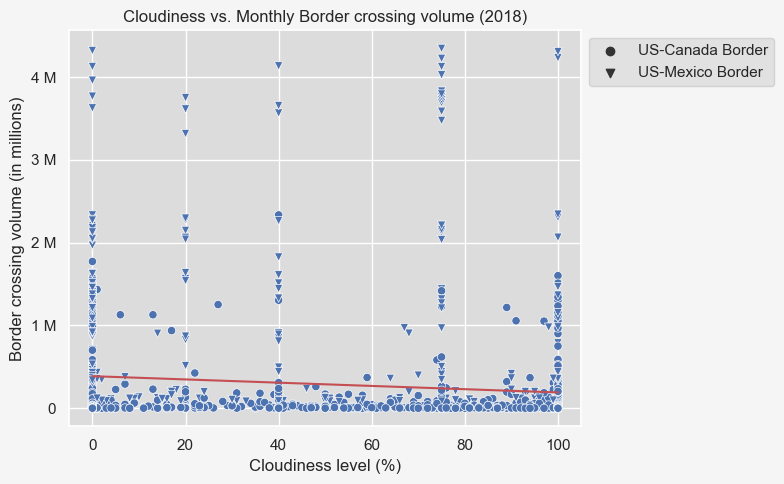

In [26]:
# Linear regression for Cloudiness vs. Monthly Border crossing traffic volume

# Define x-values, y-values and tex-coord for the plot
x_values = weather_data["Cloudiness"]
y_values = weather_data["Value"]
text_coords = (-30,2500000)

# Plot the chart and call the function to plot the linear regression
Fig32 = sns.scatterplot(x ='Cloudiness', y ='Value', data = weather_data, 
                        palette =color_theme, markers=['o', 'v'], style = "Border")
linear_regression_plot(x_values, y_values, text_coords)

# Format y-axis values to display in a better format
Fig32.yaxis.set_major_formatter(ticker.EngFormatter())

# Set chart title and axis labels
Fig32.set_xlabel("Cloudiness level (%)")
Fig32.set_ylabel("Border crossing volume (in millions)")
Fig32.set_title("Cloudiness vs. Monthly Border crossing volume (2018)")

# Set legend details and figure parameters
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.rcParams['figure.figsize']=8,5
plt.rcParams["figure.autolayout"] = True

# Save the figure (This was commented out after saving to avoid overwriting the image every time the Jupyter Notebook is run again)
# plt.savefig("Images/Fig32.png")

# Show the chart
plt.show()

The p-value is: 3.4396454912404244e-06
The r-value is: -0.12653018698759985


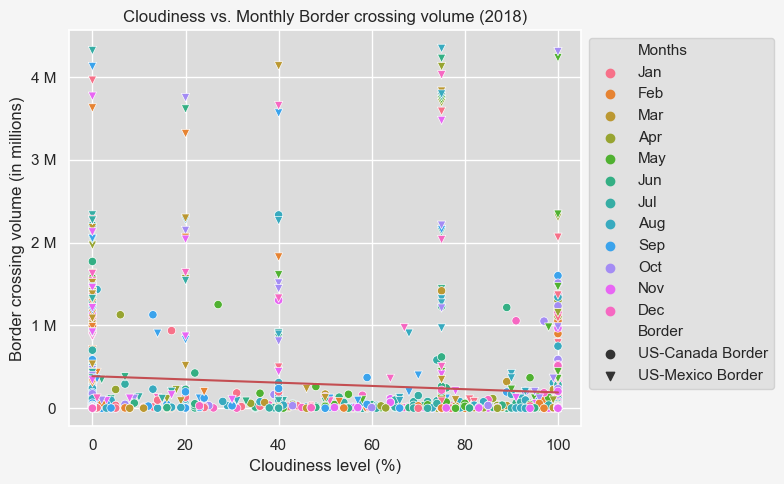

In [28]:
# Linear regression for Cloudiness vs. Monthly Border crossing traffic volume 

# Define x-values, y-values and tex-coord for regression line calculation
x_values = weather_data["Cloudiness"]
y_values = weather_data["Value"]
text_coords = (-30, 2500000)

# Plot the chart and call the function to plot the linear regression
Fig33 = sns.scatterplot(x ='Cloudiness', y ='Value', data = weather_data, hue ='Months', 
                        palette =color_theme, markers=['o', 'v'], style = "Border")
linear_regression_plot(x_values, y_values, text_coords)

# Format y-axis values to display in a better format
Fig33.yaxis.set_major_formatter(ticker.EngFormatter())

# Set chart title and axis labels
Fig33.set_xlabel("Cloudiness level (%)")
Fig33.set_ylabel("Border crossing volume (in millions)")
Fig33.set_title("Cloudiness vs. Monthly Border crossing volume (2018)")

# Set legend details and figure parameters
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.rcParams['figure.figsize']=8,5
plt.rcParams["figure.autolayout"] = True

# Save the figure (This was commented out after saving to avoid overwriting the image every time the Jupyter Notebook is run again)
# plt.savefig("Images/Fig33.png")

# Show the chart
plt.show()

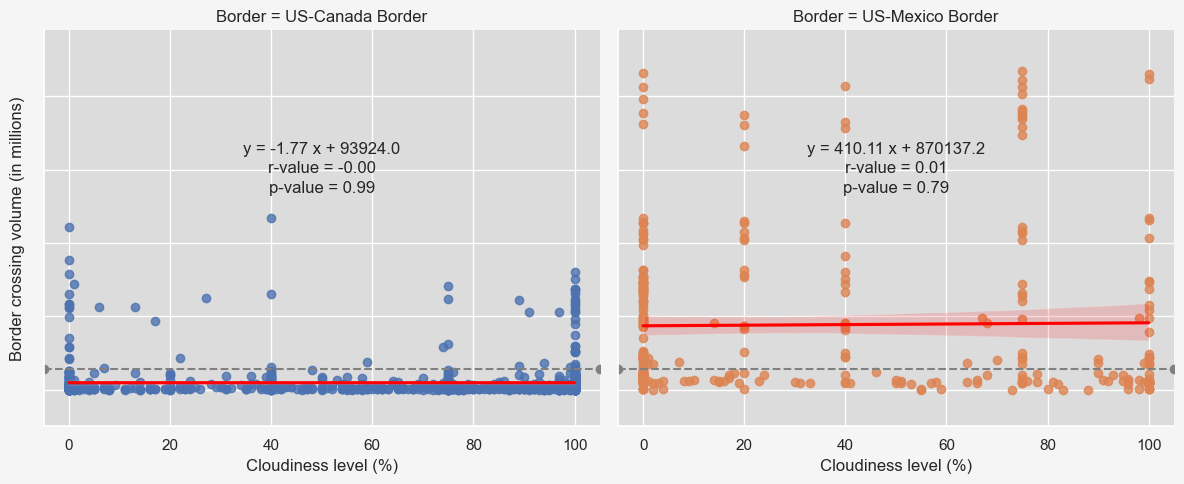

In [29]:
# Analysis of Cloudiness vs. Monthly Border crossing traffic volume between US-Canada and US-Mexico borders

# Plot the chart 
Fig34 = sns.lmplot(x ="Cloudiness", y ="Value", col="Border", data = weather_data,
                   aspect=1.2, palette=color_theme, line_kws={'color': 'red'}, 
                   hue = "Border", legend="false", sharey=True)

# Calculate regression line and add the annotations
def annotate(data, **kws):
        x, y, r_value, p_value, std_err = \
            stats.linregress(data['Cloudiness'],data['Value'])
        ax = plt.gca()
        ax.text(0.5, 0.7, f"y = {x:.2f} x + {y:.1f}",
                horizontalalignment='center',
                verticalalignment='center',
                transform=ax.transAxes)
        ax.text(0.5, 0.65, f"r-value = {r_value:.2f}", 
                horizontalalignment='center',
                verticalalignment='center',
                transform=ax.transAxes)
        ax.text(0.5, 0.6, f"p-value = {p_value:.2f}", 
                horizontalalignment='center',
                verticalalignment='center',
                transform=ax.transAxes)
Fig34.map_dataframe(annotate)

# Set axis labels
Fig34.set_xlabels("Cloudiness level (%)")
Fig34.set_ylabels("Border crossing volume (in millions)")

# Set figure parameters
Fig34.set_yticklabels()
Fig34.axes[0, 1].tick_params(labelleft=True)
plt.ylim(-500000, 4900000)
plt.rcParams['figure.figsize']=5,3
plt.rcParams["figure.autolayout"] = True

# Add line showing mean values across the charts
Fig34.refline(y=weather_data["Value"].mean())

# Save the figure (This was commented out after saving to avoid overwriting the image every time the Jupyter Notebook is run again)
# plt.savefig("Images/Fig34.png")

# Show the chart
plt.show()

## Wind Speed vs. Average Monthly Border traffic

The p-value is: 5.804724222114703e-13
The r-value is: 0.19525610256549117


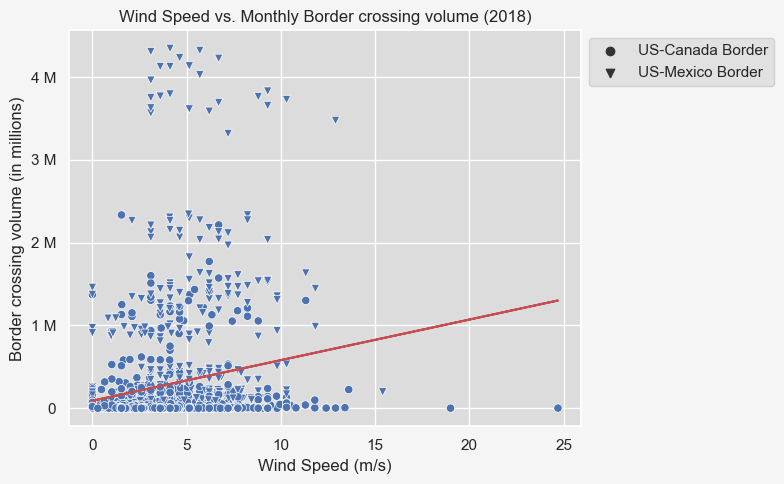

In [31]:
# Linear regression for Wind Speed vs. Monthly Border crossing traffic volume

# Define x-values, y-values and tex-coord for the plot
x_values = weather_data["Wind Speed"]
y_values = weather_data["Value"]
text_coords = (-30,2500000)

# Plot the chart and call the function to plot the linear regression
Fig35 = sns.scatterplot(x ='Wind Speed', y ='Value', data = weather_data, 
                        palette =color_theme, markers=['o', 'v'], style = "Border")
linear_regression_plot(x_values, y_values, text_coords)

# Format y-axis values to display in a better format
Fig35.yaxis.set_major_formatter(ticker.EngFormatter())

# Set chart title and axis labels
Fig35.set_xlabel("Wind Speed (m/s)")
Fig35.set_ylabel("Border crossing volume (in millions)")
Fig35.set_title("Wind Speed vs. Monthly Border crossing volume (2018)")

# Set legend details and figure parameters
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.rcParams['figure.figsize']=8,5
plt.rcParams["figure.autolayout"] = True

# Save the figure (This was commented out after saving to avoid overwriting the image every time the Jupyter Notebook is run again)
# plt.savefig("Images/Fig35.png")

# Show the chart
plt.show()

The p-value is: 5.804724222114703e-13
The r-value is: 0.19525610256549117


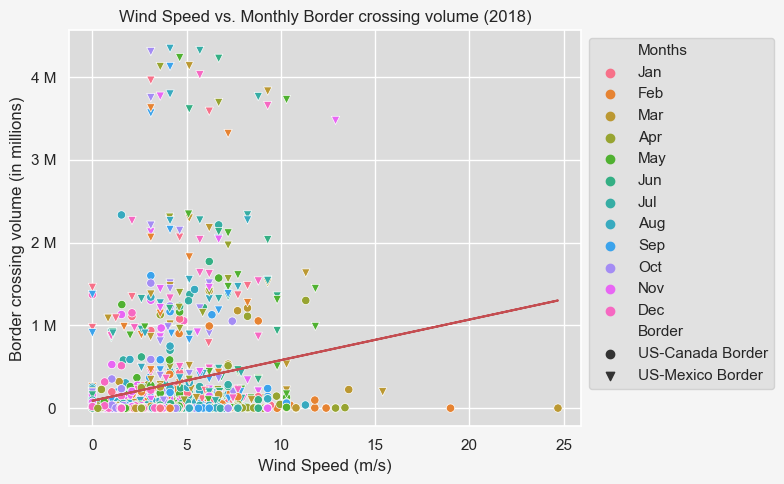

In [33]:
# Linear regression for Wind Speed vs. Monthly Border crossing traffic volume 

# Define x-values, y-values and tex-coord for regression line calculation
x_values = weather_data["Wind Speed"]
y_values = weather_data["Value"]
text_coords = (-30, 2500000)

# Plot the chart and call the function to plot the linear regression
Fig36 = sns.scatterplot(x ='Wind Speed', y ='Value', data = weather_data, hue ='Months', 
                        palette =color_theme, markers=['o', 'v'], style = "Border")
linear_regression_plot(x_values, y_values, text_coords)

# Format y-axis values to display in a better format
Fig36.yaxis.set_major_formatter(ticker.EngFormatter())

# Set chart title and axis labels
Fig36.set_xlabel("Wind Speed (m/s)")
Fig36.set_ylabel("Border crossing volume (in millions)")
Fig36.set_title("Wind Speed vs. Monthly Border crossing volume (2018)")

# Set legend details and figure parameters
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.rcParams['figure.figsize']=8,5
plt.rcParams["figure.autolayout"] = True

# Save the figure (This was commented out after saving to avoid overwriting the image every time the Jupyter Notebook is run again)
# plt.savefig("Images/Fig36.png")

# Show the chart
plt.show()

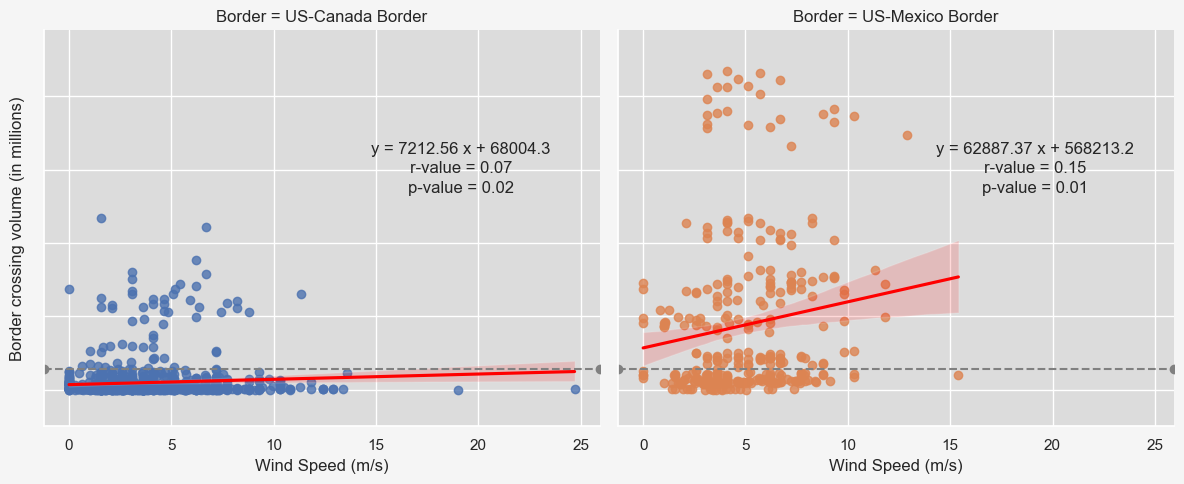

In [34]:
# Analysis of Wind Speed vs. Monthly Border crossing traffic volume between US-Canada and US-Mexico borders

# Plot the chart 
Fig37 = sns.lmplot(x ="Wind Speed", y ="Value", col="Border", data = weather_data,
                   aspect=1.2, palette=color_theme, line_kws={'color': 'red'}, 
                   hue = "Border", legend="false", sharey=True)

# Calculate regression line and add the annotations
def annotate(data, **kws):
        x, y, r_value, p_value, std_err = \
            stats.linregress(data['Wind Speed'],data['Value'])
        ax = plt.gca()
        ax.text(0.75, 0.7, f"y = {x:.2f} x + {y:.1f}",
                horizontalalignment='center',
                verticalalignment='center',
                transform=ax.transAxes)
        ax.text(0.75, 0.65, f"r-value = {r_value:.2f}", 
                horizontalalignment='center',
                verticalalignment='center',
                transform=ax.transAxes)
        ax.text(0.75, 0.6, f"p-value = {p_value:.2f}", 
                horizontalalignment='center',
                verticalalignment='center',
                transform=ax.transAxes)
Fig37.map_dataframe(annotate)

# Set axis labels
Fig37.set_xlabels("Wind Speed (m/s)")
Fig37.set_ylabels("Border crossing volume (in millions)")

# Set figure parameters
Fig37.set_yticklabels()
Fig37.axes[0, 1].tick_params(labelleft=True)
plt.ylim(-500000, 4900000)
plt.rcParams['figure.figsize']=5,3
plt.rcParams["figure.autolayout"] = True

# Add line showing mean values across the charts
Fig37.refline(y=weather_data["Value"].mean())

# Save the figure (This was commented out after saving to avoid overwriting the image every time the Jupyter Notebook is run again)
# plt.savefig("Images/Fig37.png")

# Show the chart
plt.show()